<a href="https://colab.research.google.com/github/17wh1a1228/Covid-Vaccine-Sentiment-Analysis/blob/main/541_Final_Group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from collections import Counter
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/vaccination_all_tweets.csv')

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
df.shape

(228207, 16)

In [ ]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [ ]:
df.isnull()   

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
228203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
228204,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
228205,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
228202    False
228203    False
228204    False
228205    False
228206    False
Length: 228207, dtype: bool

In [ ]:
df.duplicated().sum() 

0

In [ ]:
df.fillna(method='ffill', inplace=True) 

In [ ]:
df.fillna(method='bfill', inplace=False) 

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,['PfizerBioNTech'],Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...","['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,"Vancouver, BC - Canada",Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0,0,False


In [ ]:
df.isnull().sum() 

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords]))

df.to_csv('vaccination_all_tweets_cleaned.csv', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')

df['tokens'] = df['text'].apply(nltk.word_tokenize)

print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                    id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel     Vancouver, BC - Canada   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405  

In [ ]:
tokens = [token for token_list in df['tokens'] for token in token_list]

word_counts = Counter(tokens)

#Print the top 10 words and their frequency
for word, count in word_counts.most_common(10):
    print(f'{word}: {count}')

#: 420751
:: 277170
https: 194902
,: 134075
@: 122306
.: 79594
vaccine: 45556
COVAXIN: 43569
Moderna: 41184
!: 33284


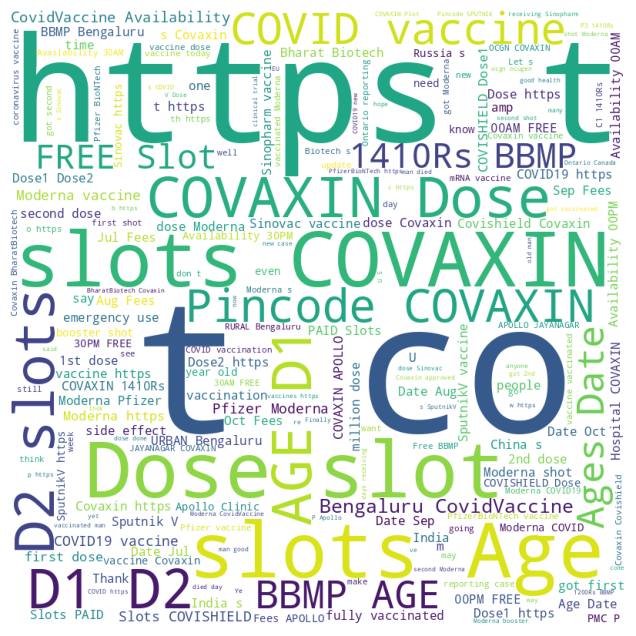

In [ ]:
from wordcloud import WordCloud

# Identify most occured prevalant words in tweets
token_string = ' '.join(tokens)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(token_string)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

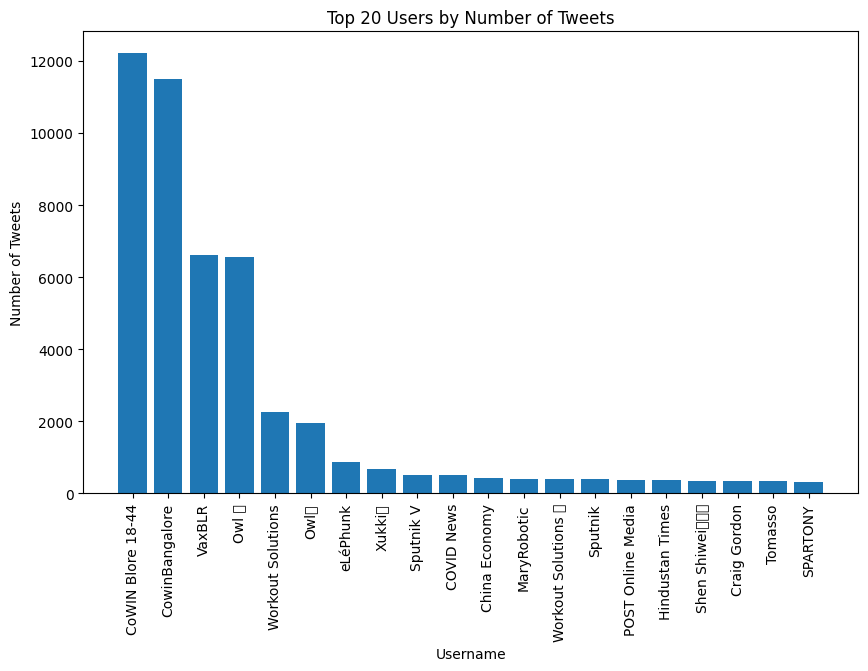

In [ ]:
top_users = df['user_name'].value_counts()[:20]

plt.figure(figsize=(10, 6))
plt.bar(top_users.index, top_users.values)
plt.xticks(rotation=90)
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.title('Top 20 Users by Number of Tweets')
plt.show()

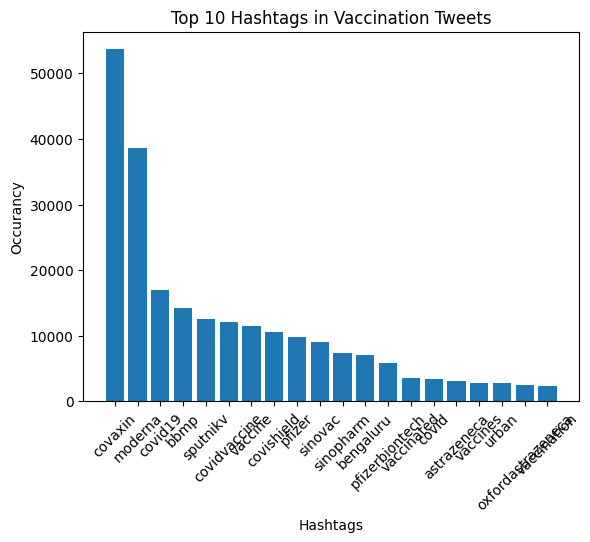

In [ ]:
hashtags = []
for tweet in df['text']:
    tags = [tag.strip("#").lower() for tag in tweet.split() if tag.startswith("#")]
    hashtags.extend(tags)

hashtag_counts = Counter(hashtags)
top_hashtags = hashtag_counts.most_common(20)

x = [hashtag[0] for hashtag in top_hashtags]
y = [hashtag[1] for hashtag in top_hashtags]
plt.bar(x, y)
plt.xticks(rotation=45)
plt.xlabel('Hashtags')
plt.ylabel('Occurancy')
plt.title('Top 10 Hashtags in Vaccination Tweets')
plt.show()

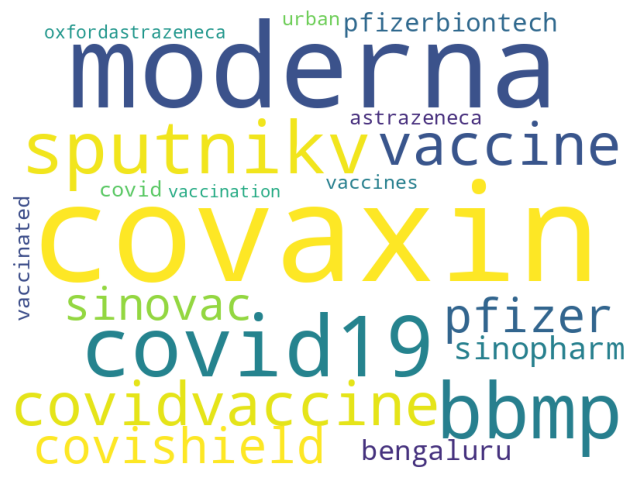

In [ ]:
# Identify most occured hashtags
wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(dict(top_hashtags))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

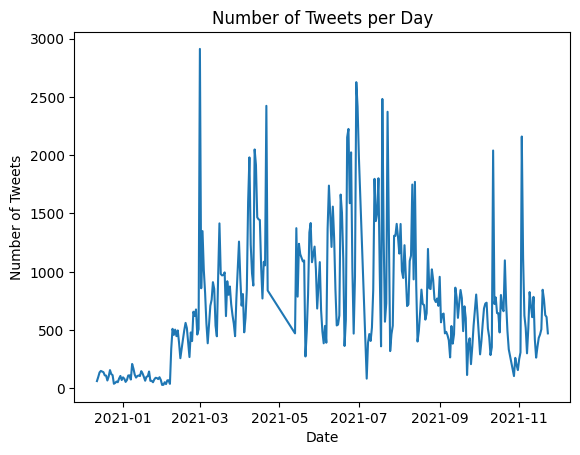

In [ ]:
dates = pd.to_datetime(df['date']).dt.date

date_counts = Counter(dates)
x = sorted(date_counts.keys())
y = [date_counts[date] for date in x]
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Day')
plt.show()

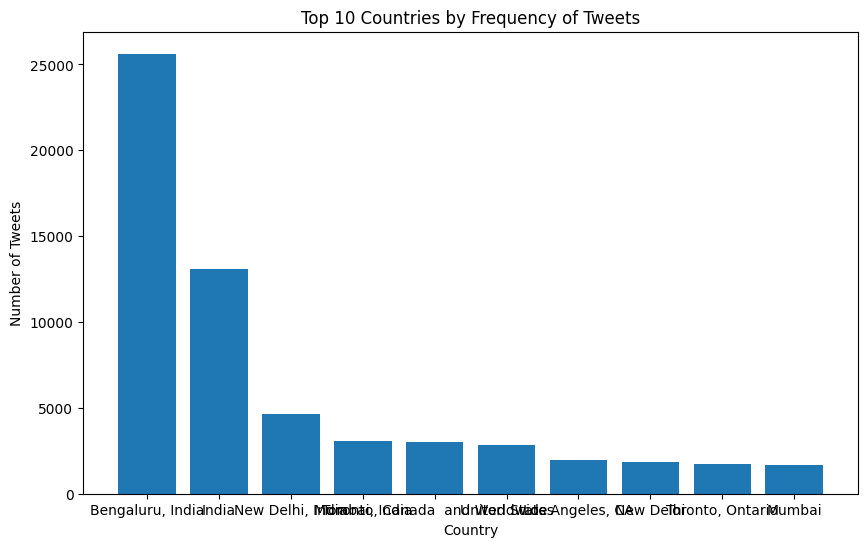

In [ ]:
top_countries = df['user_location'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.bar(top_countries.index, top_countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Tweets')
plt.title('Top 10 Countries by Frequency of Tweets')
plt.show()

In [ ]:
df.shape

(228207, 17)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


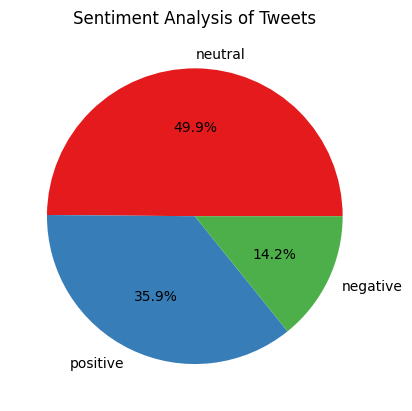

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['polarity'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

sentiment_counts = df['sentiment'].value_counts()

plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Analysis of Tweets')
plt.show()

In [ ]:
from textblob import TextBlob

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_emotion_labels(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

def map_sentiment_to_emotion(sentiment):
    polarity, subjectivity = sentiment
    emotion_mapping = {
        'anger': 'Anger',
        'fear': 'Fear',
        'sadness': 'Sadness',
        'neutral': 'Neutral',
        'trust': 'Trust',
        'anticipation': 'Anticipation'
    }
    emotions = []
    if polarity > 0:
        emotions.append('trust')
    if polarity < 0:
        emotions.append('fear')
    if polarity == 0 and subjectivity > 0.5:
        emotions.append('neutral')
    if polarity == 0 and subjectivity <= 0.5:
        emotions.append('anticipation')
    return [emotion_mapping[emotion] for emotion in emotions]

tweet_emotions = df['text'].apply(get_emotion_labels)

emotion_labels = [map_sentiment_to_emotion(emotion) for emotion in tweet_emotions]
overall_mood = set([emotion for emotions in emotion_labels for emotion in emotions])

print("Overall Mood:", ', '.join(overall_mood))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Overall Mood: Neutral, Fear, Trust, Anticipation


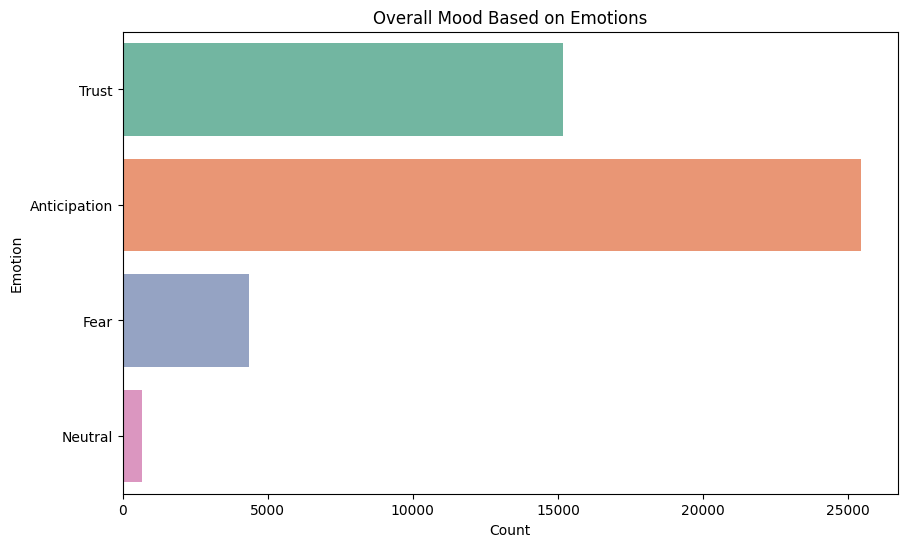

In [ ]:
emotion_counts = {}
for emotions in emotion_labels:
    for emotion in emotions:
        if emotion in emotion_counts:
            emotion_counts[emotion] += 1
        else:
            emotion_counts[emotion] = 1

emotions = list(emotion_counts.keys())
count_values = list(emotion_counts.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=count_values, y=emotions, palette='Set2')

plt.xlabel('Count')
plt.ylabel('Emotion')
plt.title('Overall Mood Based on Emotions')

plt.show()

In [ ]:
df.shape


(228207, 19)

In [ ]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'tokens', 'polarity', 'sentiment'],
      dtype='object')

In [ ]:
df_copy = df

In [ ]:
df = df.sample(frac=0.2, random_state=42)


In [ ]:
df.shape

(45641, 19)

In [ ]:
# Drop the columns that are not important for sentiment analysis
cols_to_drop = ['id', 'user_name', 'user_location', 'user_description', 'user_created', 
                'user_followers', 'user_friends', 'user_favourites', 'user_verified', 
                'date', 'hashtags', 'source', 'retweets', 'favorites', 'is_retweet']
df = df.drop(columns=cols_to_drop)

In [ ]:
df.shape

(45641, 4)

In [ ]:
df.columns


Index(['text', 'tokens', 'polarity', 'sentiment'], dtype='object')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(df['sentiment'])


vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test = le.fit_transform(y_test)

In [ ]:
X_train.shape


(36512, 5000)

In [ ]:
y_train.shape

(36512,)

In [ ]:
X_test.shape


(9129, 5000)

In [ ]:
y_test.shape

(9129,)

# SVM

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_probs = svm.predict_proba(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)

In [ ]:
print('Accuracy score:', svm_acc)
print('Classification report:\n', svm_report)


Accuracy score: 0.8641691313396868
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.59      0.71      1314
           1       0.83      0.98      0.90      4545
           2       0.92      0.82      0.87      3270

    accuracy                           0.86      9129
   macro avg       0.88      0.79      0.82      9129
weighted avg       0.87      0.86      0.86      9129



# Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_probs = nb.predict_proba(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Accuracy:", nb_acc)
nb_report = classification_report(y_test, nb_pred)
print(nb_report)

Accuracy: 0.7686493591850148
              precision    recall  f1-score   support

           0       0.73      0.49      0.59      1314
           1       0.84      0.80      0.82      4545
           2       0.70      0.83      0.76      3270

    accuracy                           0.77      9129
   macro avg       0.76      0.71      0.72      9129
weighted avg       0.77      0.77      0.77      9129



# Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Accuracy:", rf_acc)
rf_report = classification_report(y_test, rf_pred)
print(rf_report)

Accuracy: 0.8409464344396976
              precision    recall  f1-score   support

           0       0.87      0.51      0.64      1314
           1       0.80      0.97      0.88      4545
           2       0.90      0.79      0.84      3270

    accuracy                           0.84      9129
   macro avg       0.86      0.76      0.79      9129
weighted avg       0.85      0.84      0.83      9129



# Logistic regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_probs = lr.predict_proba(X_test)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Accuracy:", lr_acc)
lr_report = classification_report(y_test, lr_pred)
print(lr_report)

Accuracy: 0.8549676853981816
              precision    recall  f1-score   support

           0       0.86      0.58      0.69      1314
           1       0.83      0.96      0.89      4545
           2       0.89      0.82      0.86      3270

    accuracy                           0.85      9129
   macro avg       0.86      0.79      0.81      9129
weighted avg       0.86      0.85      0.85      9129



# Performance Metrics

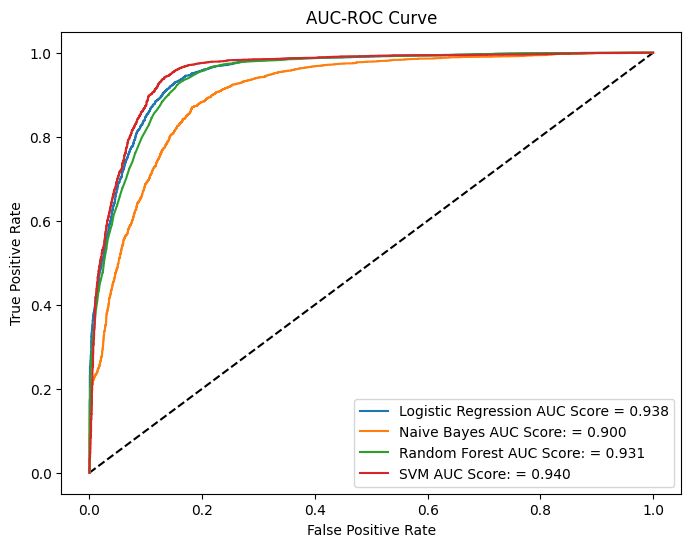

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

auc_roc_lr = roc_auc_score(y_test, lr_probs, multi_class='ovr')
auc_roc_svm = roc_auc_score(y_test, svm_probs, multi_class='ovr')
auc_roc_nb = roc_auc_score(y_test, nb_probs, multi_class='ovr')
auc_roc_rf = roc_auc_score(y_test, rf_probs, multi_class='ovr')


plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs[:,1], pos_label=svm.classes_[1])
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs[:,1], pos_label=nb.classes_[1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs[:,1], pos_label=rf.classes_[1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs[:,1], pos_label=lr.classes_[1])
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression AUC Score = {auc_roc_lr:.3f}")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes AUC Score: = {auc_roc_nb:.3f}")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest AUC Score: = {auc_roc_rf:.3f}")
plt.plot(fpr_svm, tpr_svm, label=f"SVM AUC Score: = {auc_roc_svm:.3f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show() 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

svm_precision = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_f1 = f1_score(y_test, svm_pred, average='macro')

nb_precision = precision_score(y_test, nb_pred, average='macro')
nb_recall = recall_score(y_test, nb_pred, average='macro')
nb_f1 = f1_score(y_test, nb_pred, average='macro')

rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

lr_precision = precision_score(y_test, lr_pred, average='macro')
lr_recall = recall_score(y_test, lr_pred, average='macro')
lr_f1 = f1_score(y_test, lr_pred, average='macro')

print("SVM: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1 = {:.2f}".format(svm_acc, svm_precision, svm_recall, svm_f1))
print("Naive Bayes: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1 = {:.2f}".format(nb_acc, nb_precision, nb_recall, nb_f1))
print("Random Forest: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1 = {:.2f}".format(rf_acc, rf_precision, rf_recall, rf_f1))
print("Logistic Regression: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1 = {:.2f}".format(lr_acc, lr_precision, lr_recall, lr_f1))

SVM: Accuracy = 0.86, Precision = 0.88, Recall = 0.79, F1 = 0.82
Naive Bayes: Accuracy = 0.77, Precision = 0.76, Recall = 0.71, F1 = 0.72
Random Forest: Accuracy = 0.84, Precision = 0.86, Recall = 0.76, F1 = 0.79
Logistic Regression: Accuracy = 0.85, Precision = 0.86, Recall = 0.79, F1 = 0.81


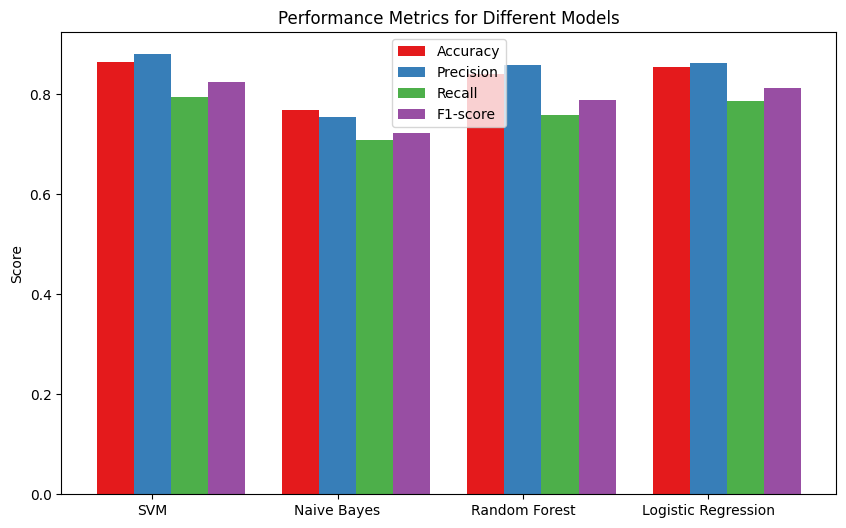

In [ ]:
models = ['SVM', 'Naive Bayes', 'Random Forest', 'Logistic Regression']
accuracy = [svm_acc, nb_acc, rf_acc, lr_acc]
precision = [svm_precision, nb_precision, rf_precision, lr_precision]
recall = [svm_recall, nb_recall, rf_recall, lr_recall]
f1_score = [svm_f1, nb_f1, rf_f1, lr_f1]

sns.set_palette('Set1')

x = np.arange(len(models))
width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracy, width, label='Accuracy')
ax.bar(x, precision, width, label='Precision')
ax.bar(x + width, recall, width, label='Recall')
ax.bar(x + 2 * width, f1_score, width, label='F1-score')

ax.set_ylabel('Score')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()